In [76]:
from IPython.display import IFrame

In [77]:
%matplotlib inline

# *Hubble and the origins of DESI*

The year 1929 brought us the Oscars, the first car radio and Edwin Hubble's unexpected observation about galxies!

![title](desihigh/images/edwin-hubble.jpg)

Photo credit:  Margaret Bourke-White, Time & Life Pictures, Getty Images

Let's take a quick look at some of the galaxies he was looking at, Triangulum and the Large Magellanic Cloud.

![title](desihigh/images/Triangulum.jpg)
![title](desihigh/images/LMC.jpg)

In total, Edwin studied the distances of 24 galaxies from us, and their observed `redshifts'.  What does that mean?

Maybe you already know that the energy levels of Hydrogen are __quantized__, with electrons habitating a series of shells with __discrete__ energies.  When an electron transitions between any two levels, light is emitted with a wavelength neatly given by the "Rydberg" formula: 

$$
\frac{1}{\lambda_{\rm vac}} = 1.096 \times 10^{7} \left ( \frac{1}{n^2} - \frac{1}{m^2} \right ) 
$$

where $n$ and $m$ (any one of $[0, 1, 2, ... \infty]$) label the two energy levels. 

In [135]:
# First, let's import some useful packages:
import os
import sys
import astropy
import pylab           as     pl
import pandas          as     pd
import numpy           as     np


from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   pkg_resources   import resource_filename

In [4]:
# For our friends running on Google Colab - remember to 
# mount your drive for all notebooks other than Colab.ipynb
# 
# Safely ignore otherwise!
sys.path.append('/content/drive/MyDrive/desihigh/')

In [136]:
from   tools           import pubplot

from   tools.wave2rgb  import wavelength_to_rgb

In [6]:
def Rydberg(n, m):
    # Vacuum wavelengths [nanometres]
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

Let's workout the wavelengths of light that Hydrogen can emit:

In [7]:
waves = []

print('n \t m \t Wavelength [nm]')

for n in np.arange(1, 10, 1):
    for m in np.arange(n+1, 10, 1):
        wave = Rydberg(n, m)        
        waves.append(wave)
        
        print('{:d} \t {:d} \t {:.3f}'.format(n, m, wave))

n 	 m 	 Wavelength [nm]
1 	 2 	 121.655
1 	 3 	 102.646
1 	 4 	 97.324
1 	 5 	 95.043
1 	 6 	 93.848
1 	 7 	 93.142
1 	 8 	 92.689
1 	 9 	 92.381
2 	 3 	 656.934
2 	 4 	 486.618
2 	 5 	 434.480
2 	 6 	 410.584
2 	 7 	 397.405
2 	 8 	 389.294
2 	 9 	 383.923
3 	 4 	 1876.955
3 	 5 	 1283.075
3 	 6 	 1094.891
3 	 7 	 1005.931
3 	 8 	 955.541
3 	 9 	 923.814
4 	 5 	 4055.150
4 	 6 	 2627.737
4 	 7 	 2167.662
4 	 8 	 1946.472
4 	 9 	 1819.203
5 	 6 	 7465.163
5 	 7 	 4657.086
5 	 8 	 3743.215
5 	 9 	 3299.335
6 	 7 	 12380.685
6 	 8 	 7507.821
6 	 9 	 5912.409
7 	 8 	 19075.426
7 	 9 	 11316.720
8 	 9 	 27823.100


Now let's plot the wavelengths and see the color of these lines.  If we were to look at a emitting Hydrogen atom, you'd see this:

(380.0, 780.0)

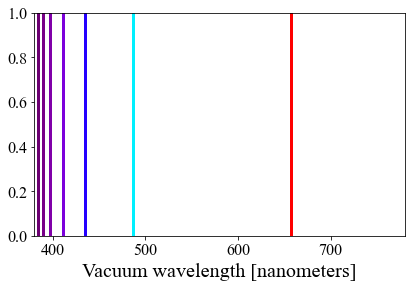

In [8]:
for wave in waves:
  # color = [r, g, b]
  color = wavelength_to_rgb(wave)       
  pl.axvline(x=wave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

If the hydrogen exists in a galaxy that is moving, we see the lines Doppler shifted. We will call this the "redshift" of the galaxy, often denote  as $z$ (https://en.wikipedia.org/wiki/Redshift). Let's say the galaxy is moving at 1% the speed of light (v = 0.1*c), we can calculate the redshift with the following equation:
$$
1 + z = \sqrt{\frac{1 + v/c}{1 - v/c}}
$$

In [9]:
def redshift(v):
    # v [speed of light].
    result = (1. + v) / (1. - v) 
    result = np.sqrt(result) - 1.
    
    return  result

(380.0, 780.0)

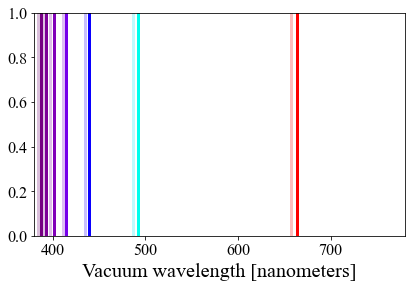

In [10]:
zz = redshift(0.01) 

for restwave in waves:
  obswave = (1. + zz) * restwave     

  color   = wavelength_to_rgb(restwave)       
  pl.axvline(x=restwave, c=color, alpha=0.25)

  color   = wavelength_to_rgb(obswave)       
  pl.axvline(x=obswave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

Here you see the original line (faint) and the line shifted if the galaxy with the emitting Hydrogen is moving. https://en.wikipedia.org/wiki/Doppler_effect will tell you all the details.

Hubble knew the lines of Hydrogen, and for many other elements.  By reversing above, he was able to calculate the velocity for many galaxies.  He found out how far away there were (from how bright some special stars in the galaxy were - https://en.wikipedia.org/wiki/Cepheid_variable) and how fast they were moving (from their redshift, as above):

Lets look at the data Hubble used.

In [137]:
#read in hubbles.dat here
hubble = pd.read_csv('hubbles.dat').drop(["Unnamed: 0"], axis=1) #remove unwanted index column
hubble

,Galaxy name,Distance [Mpc],Redshift
0,S.Mag,0.032,0.000567
1,L.Mag,0.034,0.000967
2,NGC6822,0.214,-0.000433
3,NGC598,0.263,-0.000233
4,NGC221,0.275,-0.000616
5,NGC224,0.275,-0.000733
6,NGC5457,0.450,0.000667
7,NGC4736,0.500,0.000967
8,NGC5194,0.500,0.000900
9,NGC4449,0.630,0.000667


Before we plot this data, lets try to get this in terms of velocity. Remember we can convert redshift to velocity. Use the function z_to_v.

In [138]:
def z_to_v(redshifts):
    c = 300000 #speed of light in km/s
    num = (c*i**2) + 2*c*i
    denom = (i**2) + 2*i + 2
    v = num/denom
    return v


In [139]:
#use the function z_to_v on the redshifts column of the data
velocities = []

for i in hubble['Redshift']:
    i = z_to_v(i)
    velocities = np.append(velocities, i)
print(velocities)

[ 170.  290. -130.  -70. -185. -220.  200.  290.  270.  200.  300.  -30.
  650.  150.  500.  920.  450.  500.  500.  960.  500.  850.  800. 1090.]


Now we want to relapce the Redshift column with the our list of velocities. Remember to change the name of the column to velocities, which is kilometers per second.

In [103]:
#replace the redshift column with our velocity values
hubble['Redshift'] = velocities
#rename our column
hubble.rename(columns = {'Redshift':'Velocity [km/s]'}, inplace = True)
hubble

,Galaxy name,Distance [Mpc],Velocity [km/s]
0,S.Mag,0.032,170.0
1,L.Mag,0.034,290.0
2,NGC6822,0.214,-130.0
3,NGC598,0.263,-70.0
4,NGC221,0.275,-185.0
5,NGC224,0.275,-220.0
6,NGC5457,0.450,200.0
7,NGC4736,0.500,290.0
8,NGC5194,0.500,270.0
9,NGC4449,0.630,200.0


Now we are ready to plot velocity vs distance! Feel free to clean up your graph using any commands you know.

Text(0, 0.5, 'Recession velocity [km/s]')

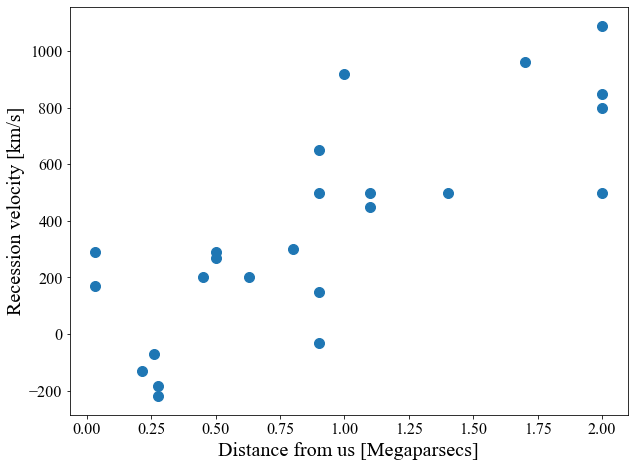

In [131]:
#plot data
fig = plt.figure(figsize=(10, 7.5))
label_style = {'fontname': 'Georgia', 'fontsize': 16} 
plt.scatter(hubble['Distance [Mpc]'], hubble['Velocity [km/s]'])

#label your axes
plt.xlabel('Distance from us [Megaparsecs]')
pl.ylabel('Recession velocity [km/s]')


<b> Answer the following questions here by editing this cell </b>

What trend do you notice based on the plot? In general, are galaxies moving away or toward us?

Based on the trend you noticed, what can you say about redshift/blueshift in the universe?

Why might this be counter intuitive? (hint: can you think of a force that does the opposite?)




(optional) Now lets add a best fit line to our data to get a more clear idea of what our trend looks like.

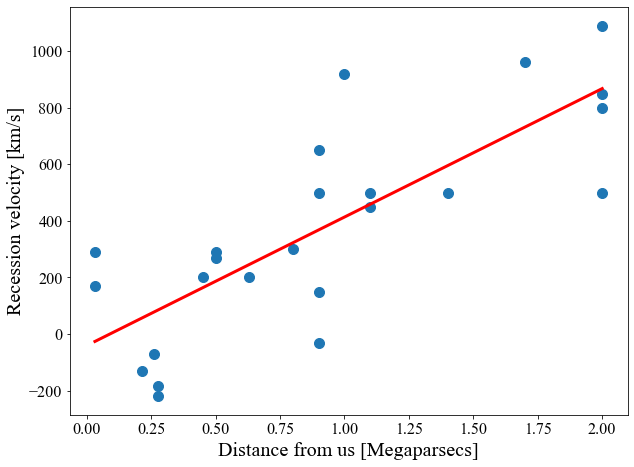

In [132]:
#plot data
fig = plt.figure(figsize=(10, 7.5))
label_style = {'fontname': 'Georgia', 'fontsize': 16} 
plt.scatter(hubble['Distance [Mpc]'], hubble['Velocity [km/s]'])

#label your axes
plt.xlabel('Distance from us [Megaparsecs]')
pl.ylabel('Recession velocity [km/s]')

#best fit line
d = np.polyfit(hubble['Distance [Mpc]'], hubble['Velocity [km/s]'], 1)
f = np.poly1d(d)
plt.plot(hubble['Distance [Mpc]'], f(hubble['Distance [Mpc]']), 'red')